In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, cross_val_score
 
import pickle
import openpyxl


In [2]:
pcos = pd.read_csv('new_pcos_dataset.csv')


In [3]:
pcos.describe()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle length(days),AMH(ng/mL),Fast food (Y/N),Cycle(R/I),FSH/LH,PRL(ng/mL),Pimples(Y/N),Age (yrs),BMI
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.325926,6.625926,6.122222,0.305556,0.272222,0.375926,4.951852,4.272950,0.514815,0.277778,3.775783,24.326352,0.488889,31.405556,24.285370
std,0.469154,4.426358,4.229925,0.461069,0.445516,0.484810,1.477568,2.654525,0.500244,0.448319,5.381258,14.983845,0.500340,5.384335,4.025824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.100000,0.000000,0.000000,0.228261,0.400000,0.000000,20.000000,12.400000
25%,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,5.000000,2.010000,0.000000,0.000000,1.415529,14.497500,0.000000,27.750000,21.600000
50%,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,5.000000,3.700000,1.000000,0.000000,2.160749,21.920000,0.000000,31.000000,24.200000
75%,1.000000,10.000000,9.000000,1.000000,1.000000,1.000000,5.000000,6.870000,1.000000,1.000000,3.888314,29.910000,1.000000,35.000000,26.600000
max,1.000000,20.000000,22.000000,1.000000,1.000000,1.000000,12.000000,8.160000,1.000000,1.000000,61.875000,128.240000,1.000000,48.000000,38.900000


In [4]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCOS (Y/N)            540 non-null    int64  
 1   Follicle No. (R)      540 non-null    int64  
 2   Follicle No. (L)      540 non-null    int64  
 3   Skin darkening (Y/N)  540 non-null    int64  
 4   hair growth(Y/N)      540 non-null    int64  
 5   Weight gain(Y/N)      540 non-null    int64  
 6   Cycle length(days)    540 non-null    int64  
 7   AMH(ng/mL)            540 non-null    float64
 8   Fast food (Y/N)       540 non-null    float64
 9   Cycle(R/I)            540 non-null    int64  
 10  FSH/LH                540 non-null    float64
 11  PRL(ng/mL)            540 non-null    float64
 12  Pimples(Y/N)          540 non-null    int64  
 13  Age (yrs)             540 non-null    int64  
 14  BMI                   540 non-null    float64
dtypes: float64(5), int64(10

In [5]:
y = pcos["PCOS (Y/N)"]
X = pcos.drop(["PCOS (Y/N)"], axis=1)

In [6]:

sc = MinMaxScaler(feature_range = (0, 1))
pcos_scaled = sc.fit_transform(pcos)

In [7]:
pcos_scaled = pd.DataFrame(pcos_scaled)
pcos_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.15,0.136364,0.0,0.0,0.0,0.3,0.244417,1.0,0.0,0.031341,0.350125,0.0,0.285714,0.260377
1,0.0,0.25,0.136364,0.0,0.0,0.0,0.3,0.177419,0.0,0.0,0.096454,0.154021,0.0,0.571429,0.471698
2,1.0,0.75,0.590909,0.0,0.0,0.0,0.3,0.810174,1.0,0.0,0.098419,0.079161,1.0,0.464286,0.486792
3,0.0,0.10,0.090909,0.0,0.0,0.0,0.3,0.138958,0.0,0.0,0.051698,0.285513,0.0,0.607143,0.652830
4,0.0,0.20,0.136364,0.0,0.0,0.0,0.3,0.267990,0.0,0.0,0.068032,0.232243,0.0,0.178571,0.290566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.0,0.00,0.045455,0.0,0.0,0.0,0.3,0.198511,0.0,0.0,0.086456,0.038329,0.0,0.535714,0.230189
536,0.0,0.35,0.409091,0.0,0.0,1.0,0.3,0.682382,0.0,0.0,0.025256,0.161843,0.0,0.357143,0.486792
537,0.0,0.00,0.045455,0.0,0.0,0.0,0.4,0.446650,0.0,0.0,0.066085,0.751017,0.0,0.571429,0.415094
538,0.0,0.30,0.318182,0.0,0.0,0.0,0.0,0.632754,0.0,1.0,0.012781,0.301079,1.0,0.250000,0.369811


In [8]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = pcos["PCOS (Y/N)"] )

In [9]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (432, 14)
X_test shape: (108, 14)
Y_train shape: (432,)
Y_test shape: (108,)


Data modeling

Logistic Regression

In [10]:

from sklearn.linear_model import LogisticRegression

logreg_model =  LogisticRegression(solver='lbfgs',random_state = 42,max_iter=7000)
lr=logreg_model.fit(X_train, Y_train)

In [11]:
filename = 'Logistic Regression.sav'
pickle.dump(lr, open(filename, 'wb'))
loaded_model_lr = pickle.load(open(filename, 'rb'))
Y_pred_logreg = loaded_model_lr.predict(X_test)

In [12]:

Y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 93.51851851851852


In [13]:
Y_pred_train = logreg_model.predict(X_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print("Training Accuracy: " + str(accuracy_train * 100))


Training Accuracy: 92.36111111111111


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')]

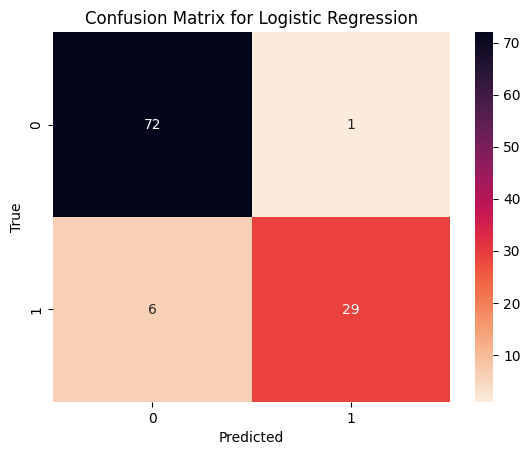

In [14]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(Y_test, Y_pred_logreg)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Logistic Regression")

In [15]:
print(classification_report(Y_test, Y_pred_logreg))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.97      0.83      0.89        35

    accuracy                           0.94       108
   macro avg       0.94      0.91      0.92       108
weighted avg       0.94      0.94      0.93       108



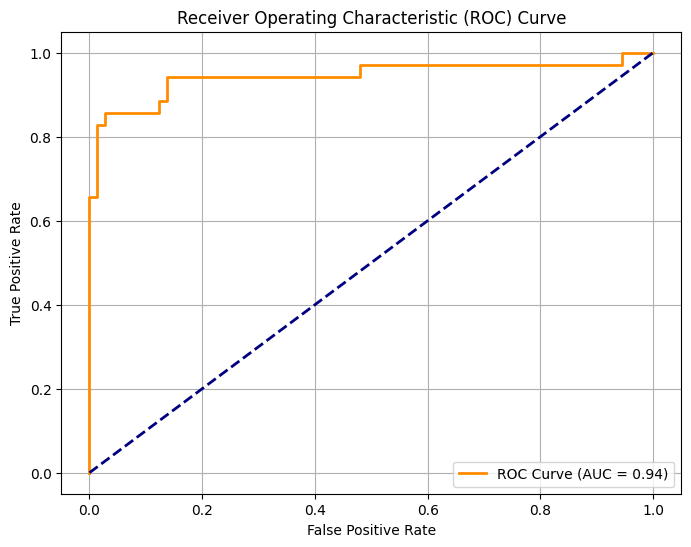

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Support vector classifier Algorithm

In [17]:

from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', random_state = 42)
svc=svc_model.fit(X_train, Y_train)

In [18]:
filename = 'Support Vector.sav'
pickle.dump(svc, open(filename, 'wb'))
loaded_model_svc = pickle.load(open(filename, 'rb'))
Y_pred_svc = loaded_model_svc.predict(X_test)

In [19]:
Y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 93.51851851851852


In [20]:
Y_pred_train = svc_model.predict(X_train)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print("Training Accuracy: " + str(accuracy_train * 100))

Training Accuracy: 92.36111111111111


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for SVC')]

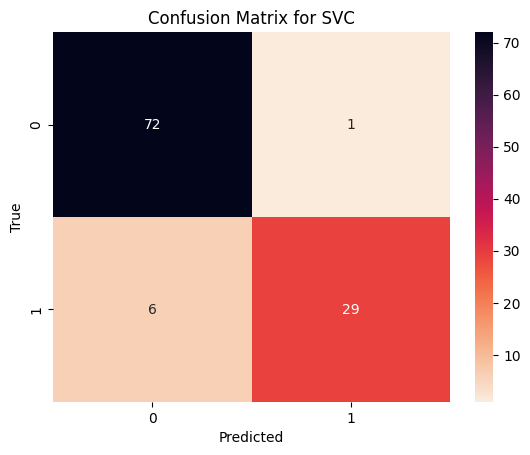

In [21]:
# Confusion matrix for  Support Vector Classifier
cm = confusion_matrix(Y_test, Y_pred_svc)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for SVC")

In [22]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.97      0.83      0.89        35

    accuracy                           0.94       108
   macro avg       0.94      0.91      0.92       108
weighted avg       0.94      0.94      0.93       108



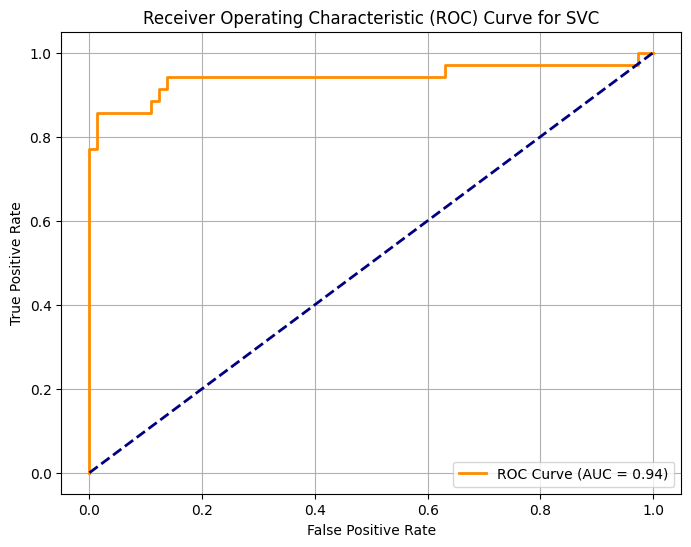

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure the SVC is trained with probability=True to get predicted probabilities
svc_model_with_proba = SVC(kernel='linear', random_state=42, probability=True)
svc_model_with_proba.fit(X_train, Y_train)

# Predict probabilities for the positive class
y_pred_proba_svc = svc_model_with_proba.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_svc)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Decision tree algorithm

In [25]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dec_tree=decisiontree_model.fit(X_train, Y_train)

In [26]:
filename = 'Decision Tree.sav'
pickle.dump(dec_tree, open(filename, 'wb'))
loaded_model_dec_tree = pickle.load(open(filename, 'rb'))
Y_pred_decisiontree = loaded_model_dec_tree.predict(X_test)

In [27]:
#Y_pred_decisiontree = decisiontree_model.predict(X_test)
accuracy_decisiontree = accuracy_score(Y_test, Y_pred_decisiontree)
print("Decision tree: " + str(accuracy_decisiontree * 100))

Decision tree: 84.25925925925925


              precision    recall  f1-score   support

           0       0.86      0.92      0.89        73
           1       0.80      0.69      0.74        35

    accuracy                           0.84       108
   macro avg       0.83      0.80      0.81       108
weighted avg       0.84      0.84      0.84       108



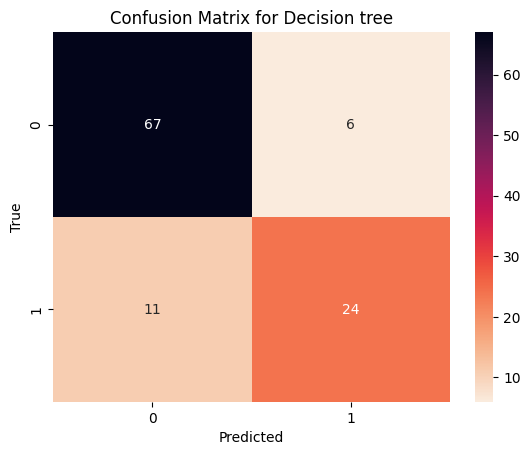

In [28]:
# Confusion matrix for  Decision tree
cm = confusion_matrix(Y_test, Y_pred_decisiontree)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Decision tree")
print(classification_report(Y_test, Y_pred_decisiontree))

In [29]:
print(classification_report(Y_test, Y_pred_decisiontree))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        73
           1       0.80      0.69      0.74        35

    accuracy                           0.84       108
   macro avg       0.83      0.80      0.81       108
weighted avg       0.84      0.84      0.84       108



Random forest algorithm

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=9)
rf=rf_model.fit(X_train,Y_train)


In [31]:
filename = 'Random Forest.sav'
pickle.dump(rf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_rf = loaded_model.predict(X_test)

In [32]:
Y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest: " + str(accuracy_rf * 100))

Random Forest: 86.11111111111111


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for Random Forest ')]

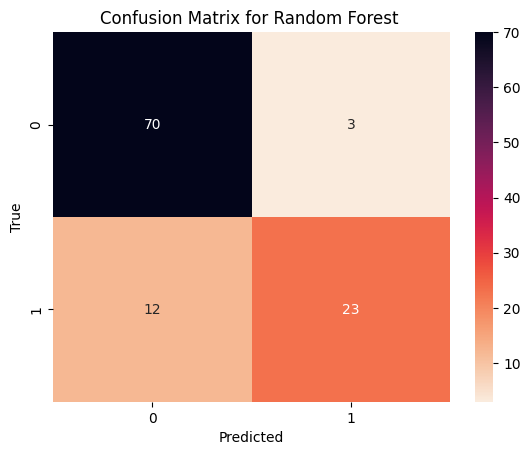

In [33]:
# Confusion matrix for  Random Forest
cm = confusion_matrix(Y_test, Y_pred_rf)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Random Forest ")

In [34]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        73
           1       0.88      0.66      0.75        35

    accuracy                           0.86       108
   macro avg       0.87      0.81      0.83       108
weighted avg       0.86      0.86      0.85       108



Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() 
nb= nb_model.fit(X_train, Y_train)
    

In [36]:
filename = 'Naive Bayes.sav'
pickle.dump(nb, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_nb = loaded_model.predict(X_test)

In [37]:
Y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print("Naive Bayes: " + str(accuracy_nb * 100))

Naive Bayes: 89.81481481481481


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes ')]

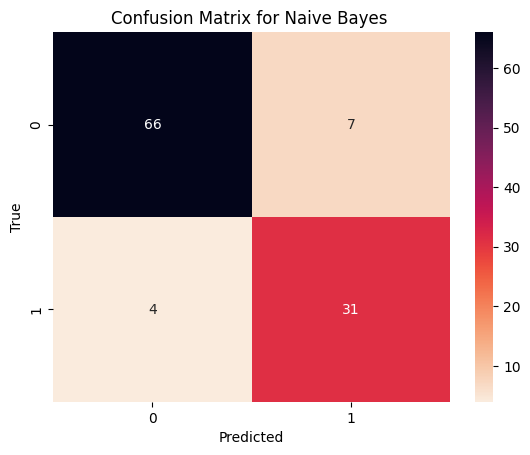

In [38]:
# Confusion matrix for Naive Bayes
cm = confusion_matrix(Y_test, Y_pred_nb)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Naive Bayes ")

In [39]:
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        73
           1       0.82      0.89      0.85        35

    accuracy                           0.90       108
   macro avg       0.88      0.89      0.89       108
weighted avg       0.90      0.90      0.90       108



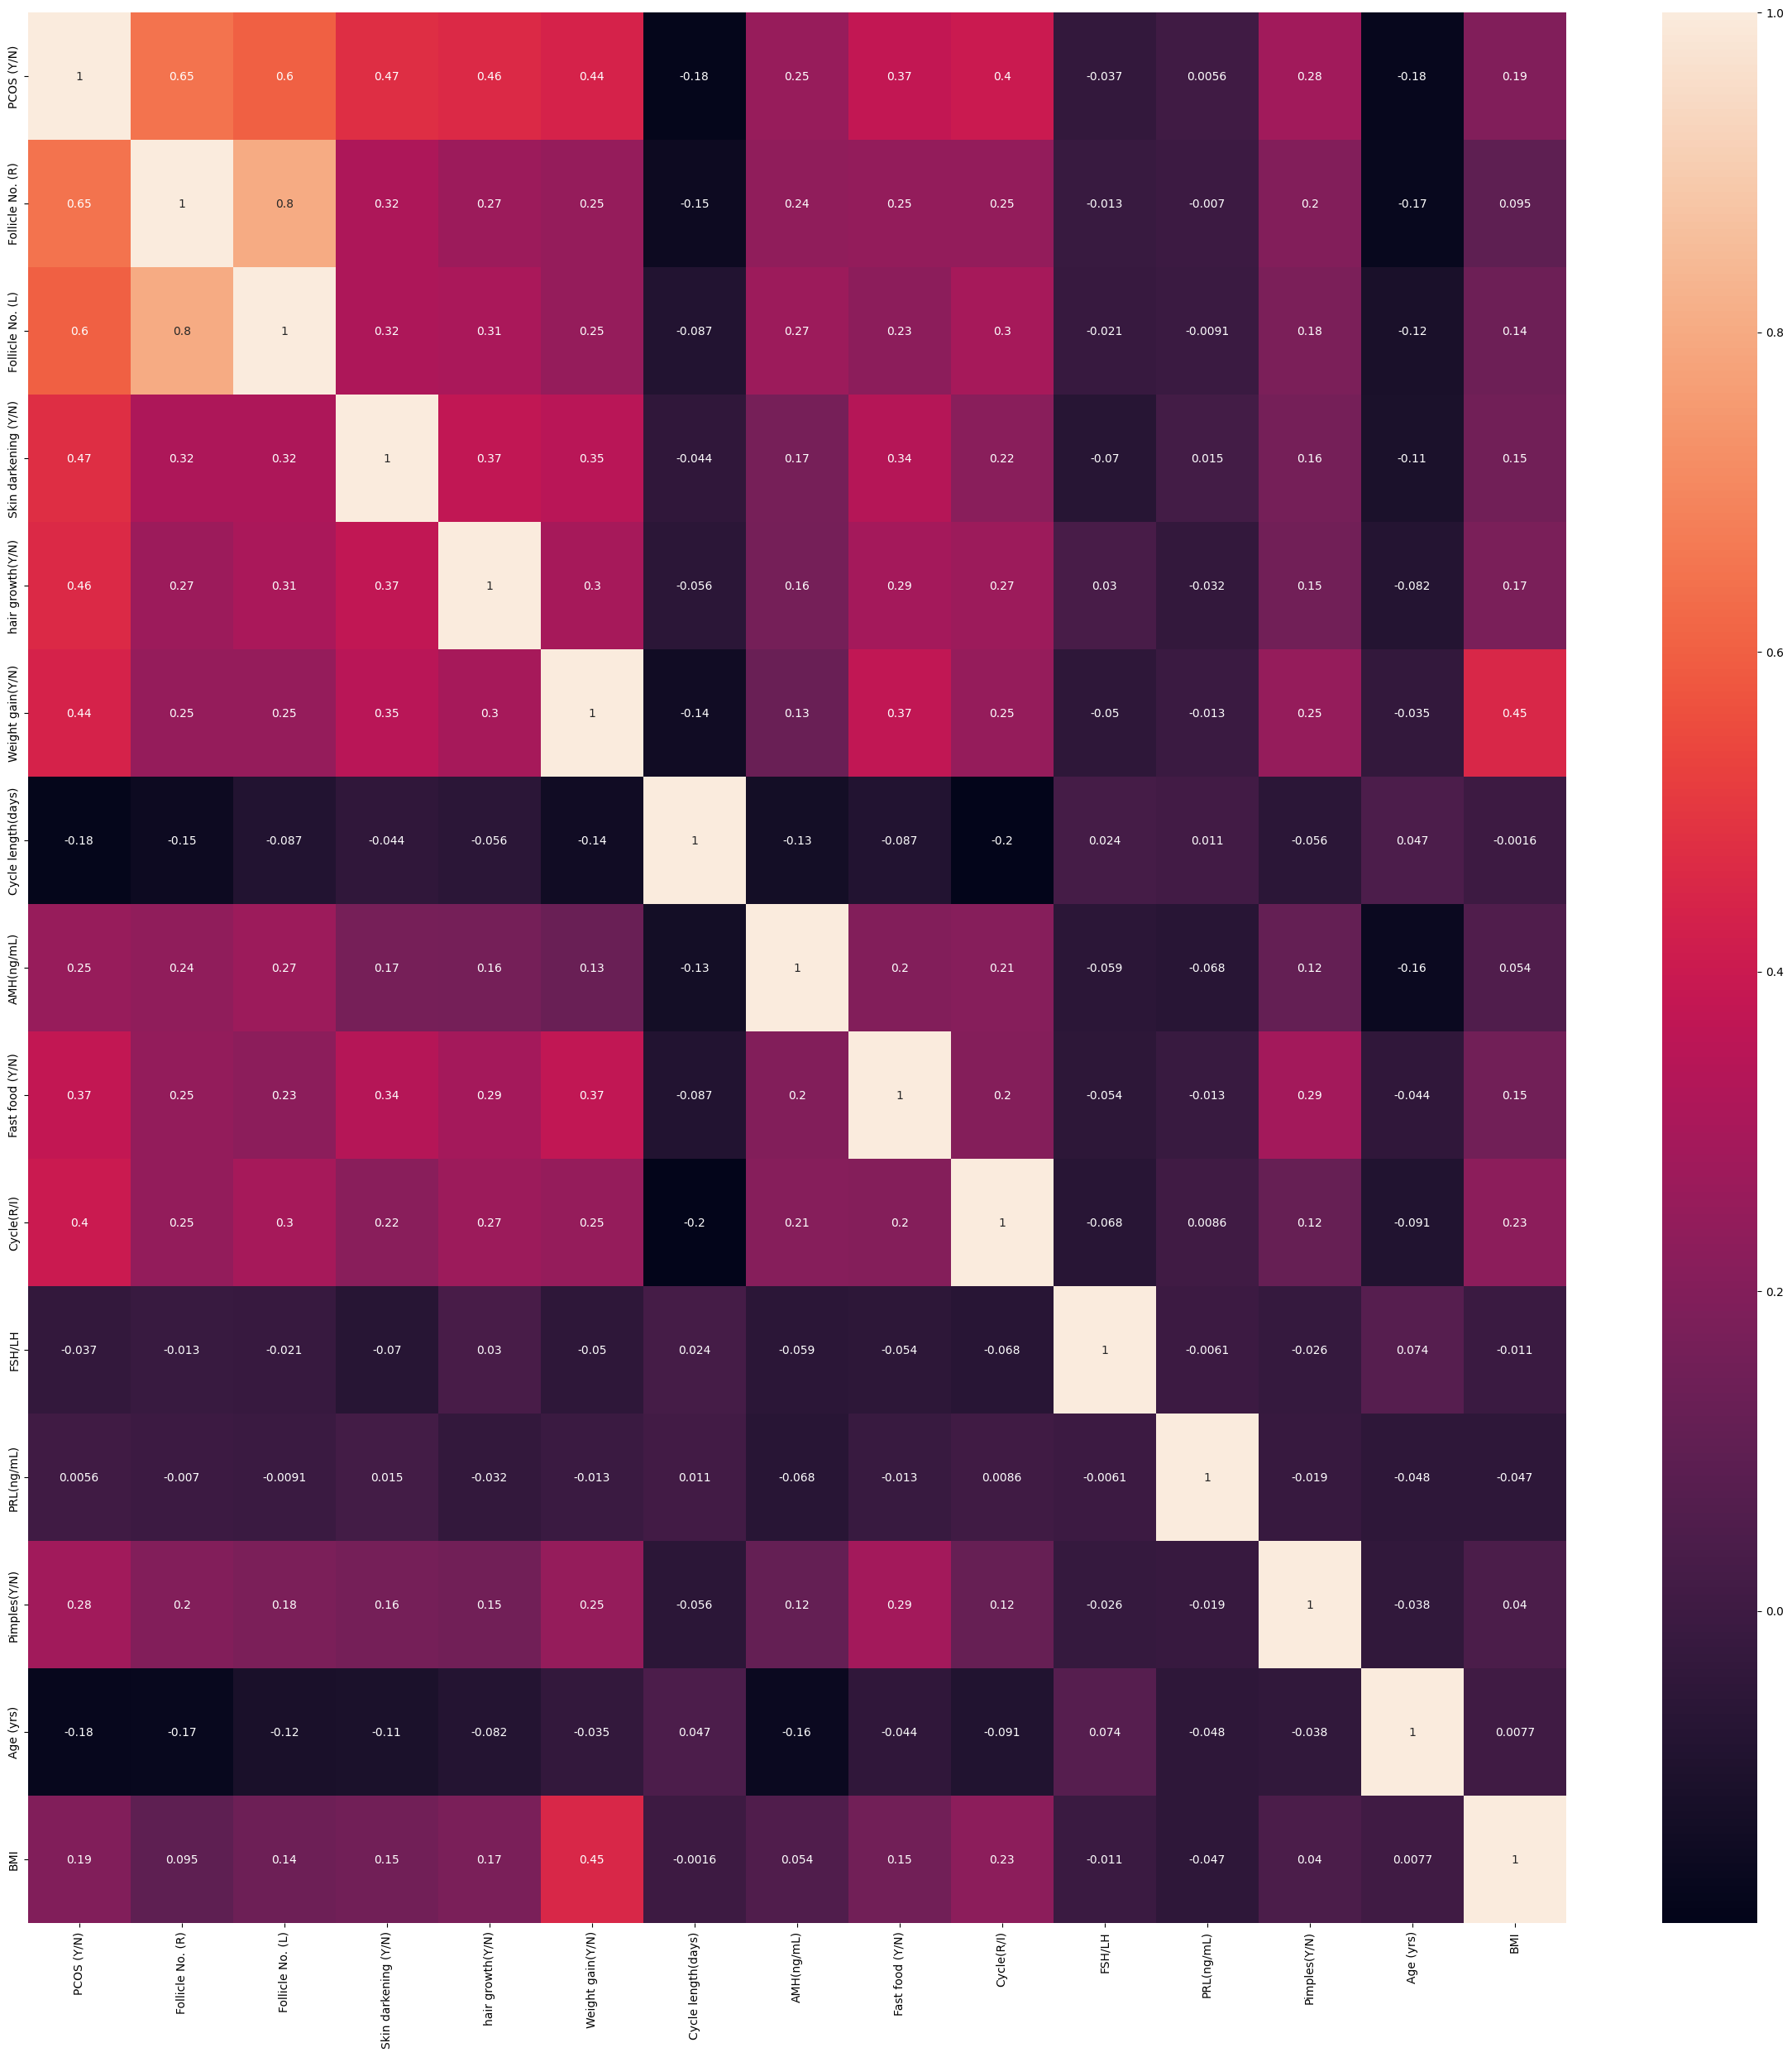

<Figure size 640x480 with 0 Axes>

In [40]:
plt.subplots(figsize=(30,30))
sns.heatmap(pcos.corr(), annot = True)
plt.show()
plt.savefig("corrmat.jpg")

In [41]:
# Comparison of models
Models = [('Logistic Regression', lr),('SVM', svc),('Decision Tree', dec_tree),('Random Forest',rf),('Naive Bayes',nb)]


results = []
names = []

for name, model in Models:
    kfold = KFold(n_splits=10)
    crossvalidation= cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(crossvalidation)
    names.append(name)
    outcome = "%s: %f (%f)" % (name, crossvalidation.mean(), crossvalidation.std())
    print(outcome)

Logistic Regression: 0.901852 (0.065237)
SVM: 0.907407 (0.065210)
Decision Tree: 0.835185 (0.084234)
Random Forest: 0.864815 (0.046885)
Naive Bayes: 0.875926 (0.067814)


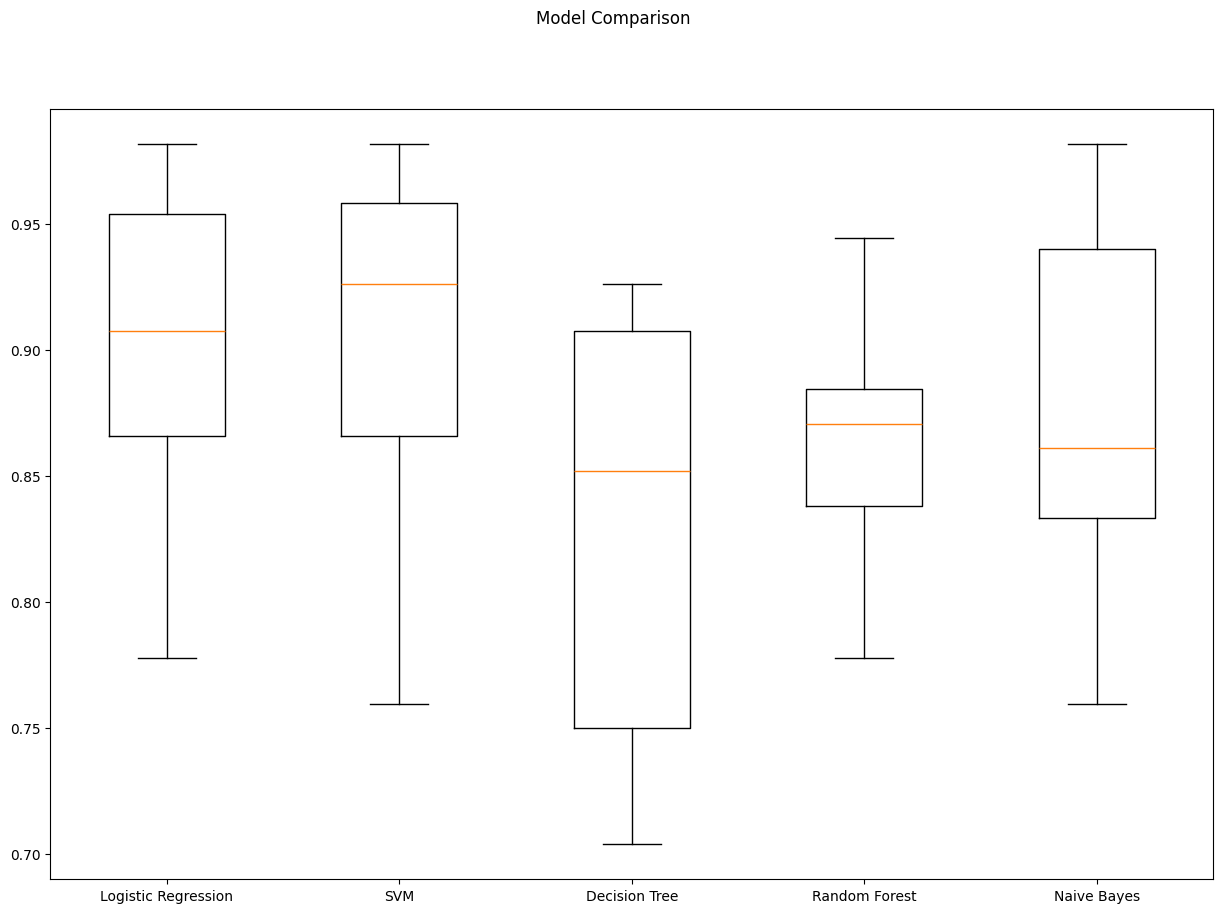

<Figure size 640x480 with 0 Axes>

In [42]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
boxplot= plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()
plt.savefig("boxplot.png")

predictive system


In [51]:
import pickle
# Save the model to a .pkl file
filename = 'Support_Vector_Model.pkl'  # Name of the .pkl file
pickle.dump(svc_model, open(filename, 'wb'))

# Load the model from the .pkl file
loaded_model_svc = pickle.load(open(filename, 'rb'))




In [56]:
import numpy as np

# Example of input data (replace with real input)
input_data = np.array([[3,3,0,0,0,5,2.07,1.0,2,2.160326086956521,45.16,0,28,19.3]])  # Example: [age, height, weight]

# Preprocessing (if necessary, e.g., scaling, encoding)
# input_data = preprocessor.transform(input_data)


In [57]:
# Make predictions
prediction = loaded_model_svc.predict(input_data)
print(prediction)  # This will print the predicted class/label


[0]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [58]:
predicted_value = loaded_model_svc.predict(input_data)
print(predicted_value)  # This will print the predicted continuous value


[0]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [59]:
# Example of converting the model output to a meaningful prediction
if prediction == 1:
    print("PCOS Detected")
else:
    print("No PCOS")


No PCOS
